In [2]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Statsmodels for time series plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# ==============================================================================
# 1. Load and preprocess data
# ==============================================================================

df = pd.read_csv("../data/consumption/dataset.csv")

df['USAGE_AT'] = pd.to_datetime(df['USAGE_AT'])

# If you want to use this as a time-indexed DataFrame:
df.set_index('USAGE_AT', inplace=True)

df

,MONTH,DAY_OF_MONTH,WEEKDAY,HOUR,temperature_2m,precipitation,direct_radiation,uv_index,wind_speed_10m,USAGE_KWH
USAGE_AT,,,,,,,,,,
2021-03-23 00:00:00+00:00,3,23,1,0,2.6,0.0,0.0,0.0,7.1,0.976258
2021-03-23 01:00:00+00:00,3,23,1,1,2.6,0.0,0.0,0.0,7.1,0.964150
2021-03-23 02:00:00+00:00,3,23,1,2,2.5,0.0,0.0,0.0,7.2,0.953400
2021-03-23 03:00:00+00:00,3,23,1,3,2.4,0.0,0.0,0.0,7.2,0.889413
2021-03-23 04:00:00+00:00,3,23,1,4,2.3,0.0,0.0,0.0,7.6,0.908430
...,...,...,...,...,...,...,...,...,...,...
2025-01-31 20:00:00+00:00,1,31,4,20,0.7,0.0,0.0,0.0,13.3,0.985828
2025-01-31 21:00:00+00:00,1,31,4,21,0.3,0.0,0.0,0.0,14.4,0.993425
2025-01-31 22:00:00+00:00,1,31,4,22,-0.0,0.0,0.0,0.0,14.4,0.987878


Basic info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33865 entries, 2021-03-23 00:00:00+00:00 to 2025-02-01 00:00:00+00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MONTH             33865 non-null  int64  
 1   DAY_OF_MONTH      33865 non-null  int64  
 2   WEEKDAY           33865 non-null  int64  
 3   HOUR              33865 non-null  int64  
 4   temperature_2m    33865 non-null  float64
 5   precipitation     33865 non-null  float64
 6   direct_radiation  33865 non-null  float64
 7   uv_index          33865 non-null  float64
 8   wind_speed_10m    33865 non-null  float64
 9   USAGE_KWH         33865 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB
None

Basic stats:
              MONTH  DAY_OF_MONTH       WEEKDAY          HOUR  temperature_2m  \
count  33865.000000  33865.000000  33865.000000  33865.000000    33865.000000   
mean       6.667474     15.819548    

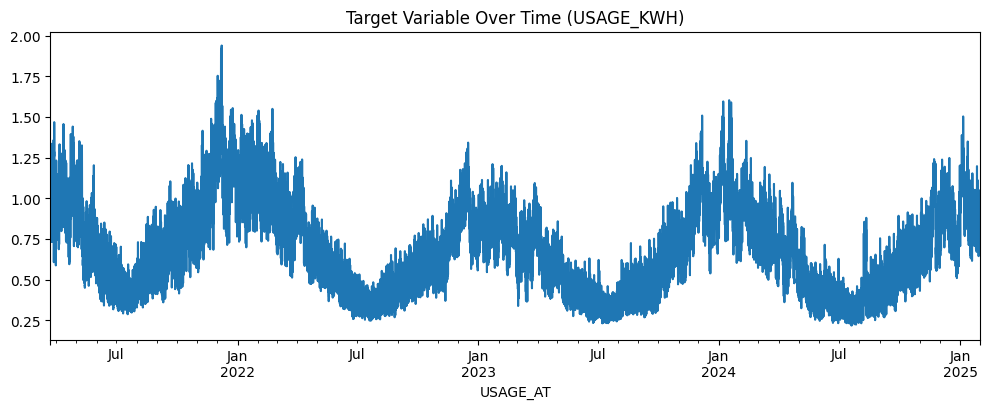

In [6]:
# ==============================================================================
# 2. Quick descriptive checks
# ==============================================================================
print("Basic info:")
print(df.info())
print("\nBasic stats:")
print(df.describe())

missing_values = df.isna().sum()
print("\nMissing values per column:")
print(missing_values)

df['USAGE_KWH'].plot(
    figsize=(12, 4), 
    title='Target Variable Over Time (USAGE_KWH)'
)
plt.show()

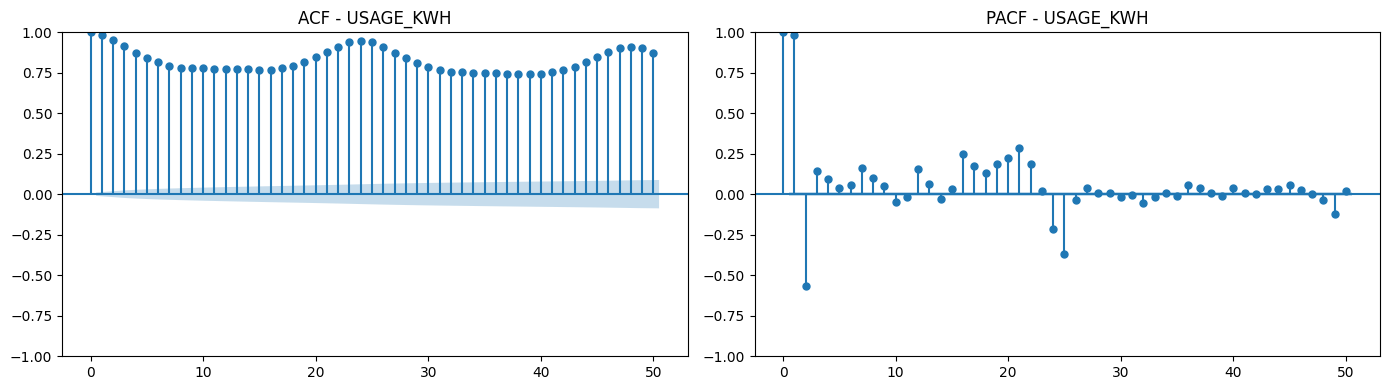

In [7]:
# ==============================================================================
# 3. Autocorrelation and partial autocorrelation of USAGE_KWH
#    (helps identify significant lags)
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df['USAGE_KWH'].dropna(), ax=axes[0], lags=50)
axes[0].set_title("ACF - USAGE_KWH")

plot_pacf(df['USAGE_KWH'].dropna(), ax=axes[1], lags=50, method='ywm')
axes[1].set_title("PACF - USAGE_KWH")
plt.tight_layout()
plt.show()

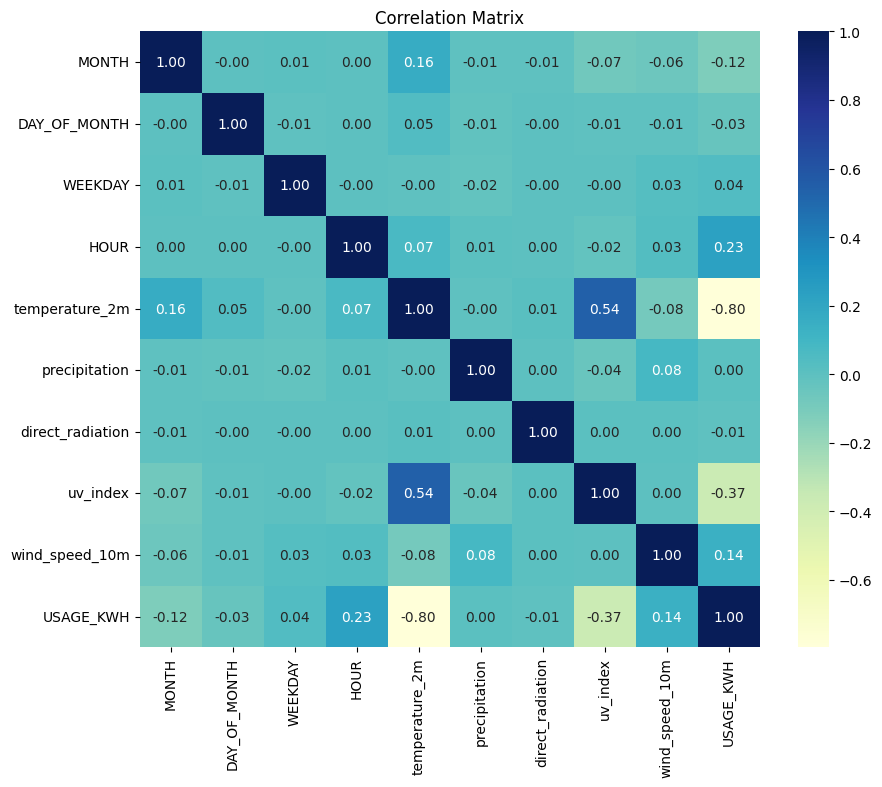

In [12]:
# ==============================================================================
# 4. Correlation among variables
# ==============================================================================

numeric_cols = ['MONTH','DAY_OF_MONTH','WEEKDAY','HOUR',
                'temperature_2m','precipitation','direct_radiation',
                'uv_index','wind_speed_10m','USAGE_KWH']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

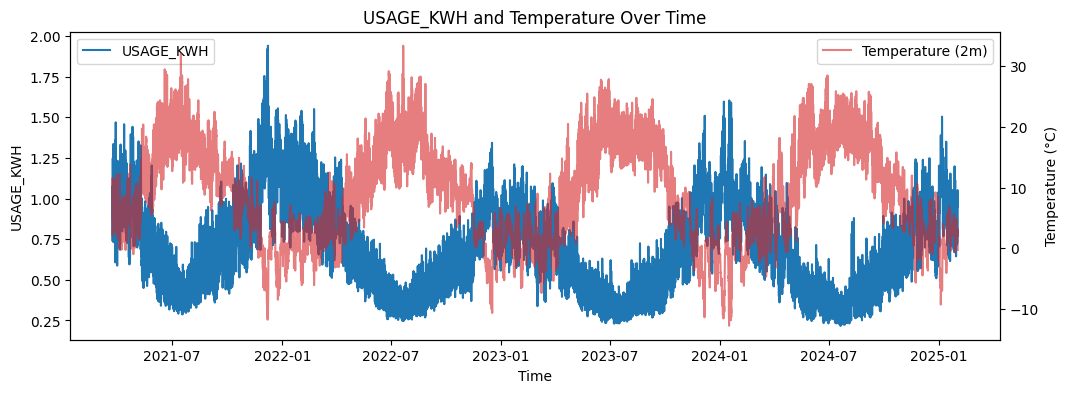

In [13]:
# ==============================================================================
# 5. Additional EDA for exogenous variables
# ==============================================================================
# Plot temperature vs USAGE_KWH over time
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df.index, df['USAGE_KWH'], color='tab:blue', label='USAGE_KWH')
ax2 = ax1.twinx()
ax2.plot(df.index, df['temperature_2m'], color='tab:red', label='Temperature (2m)', alpha=0.6)
ax1.set_xlabel('Time')
ax1.set_ylabel('USAGE_KWH')
ax2.set_ylabel('Temperature (°C)')
plt.title("USAGE_KWH and Temperature Over Time")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


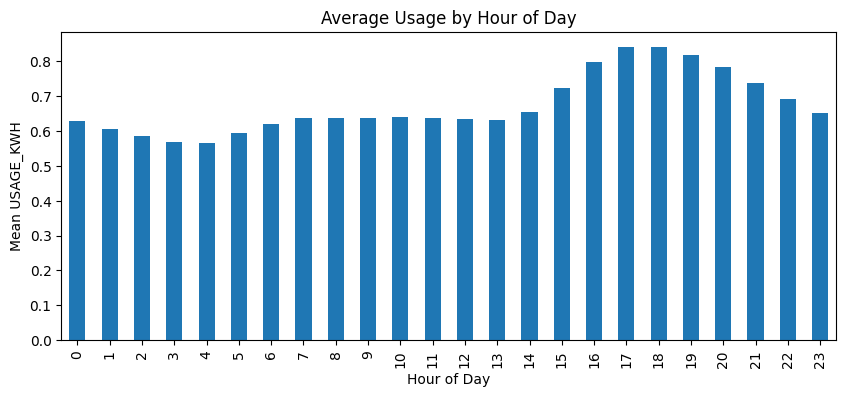

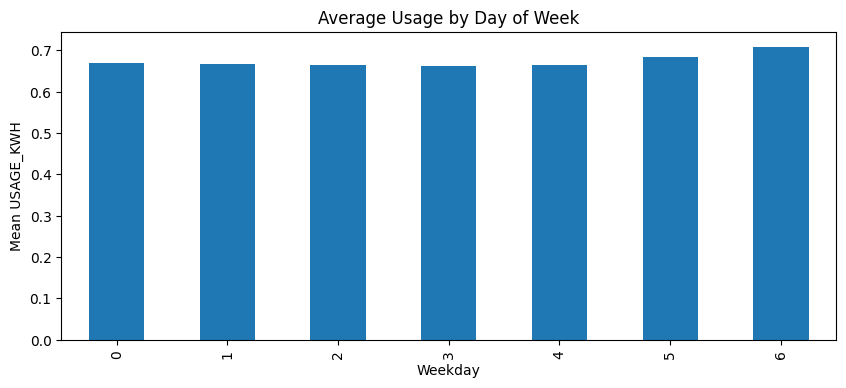

In [14]:
# ==============================================================================
# 6. Exploring seasonality / daily patterns
# ==============================================================================

# Average usage by hour of day:
hourly_usage = df.groupby(df.index.hour)['USAGE_KWH'].mean()
hourly_usage.plot(kind='bar', figsize=(10,4), title='Average Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean USAGE_KWH')
plt.show()

# Average usage by day of week:
weekday_usage = df.groupby('WEEKDAY')['USAGE_KWH'].mean()
weekday_usage.plot(kind='bar', figsize=(10,4), title='Average Usage by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Mean USAGE_KWH')
plt.show()